## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isnull().any().any()

False

In [4]:
X.shape[0]

178

In [5]:
len(y)

178

Ответ: Как видим, пропущенных значений в данных нет

In [6]:
cat_features_mask_x = (X.dtypes == "object").values
cat_features_mask_x.sum()

0

Ответ: Как видим, категориальных параметров в X нет

In [7]:
(y - 1829).sum()

-325395

Ответ: Так как возможны арифметические операции с вектором значений У, значит он не категориальный

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [8]:
from sklearn.model_selection import train_test_split # Загружаю необходимый модуль

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size= 0.3)

In [10]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
102,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438.0
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0
118,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [11]:
from sklearn.model_selection import GridSearchCV # Загружая необх модули
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [12]:
normalizer = preprocessing.MinMaxScaler()

X_train_tr = normalizer.fit_transform(X_train[["alcohol", "magnesium"]])
X_train_tr = pd.DataFrame(data=X_train_tr)

X_test_tr = normalizer.transform(X_test[["alcohol", "magnesium"]])
X_test_tr = pd.DataFrame(data=X_test_tr)

In [13]:
answer = pd.DataFrame()
parameters = [1, 3, 5, 10, 15, 25]
Train = []
Test = []
models = [] # На будущее
for k in [1, 3, 5, 10, 15, 25]:
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train_tr, y_train)
    y_pr_tr = model.predict(X_train_tr)
    Train.append(np.mean(y_pr_tr==y_train))
    y_pr_test = model.predict(X_test_tr)
    Test.append(np.mean(y_pr_test==y_test))
    models.append(model)

# Представляем ответ красиво 
answer["NN"] = parameters
answer["Train"] = Train
answer["Test"] = Test
answer

,NN,Train,Test
0,1,0.991935,0.703704
1,3,0.830645,0.703704
2,5,0.798387,0.740741
3,10,0.766129,0.740741
4,15,0.774194,0.685185
5,25,0.750000,0.759259


In [14]:
models # В 3 строчки нет параметра из-за того, что по к.д. стоит 5

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=15),
 KNeighborsClassifier(n_neighbors=25)]

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [15]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

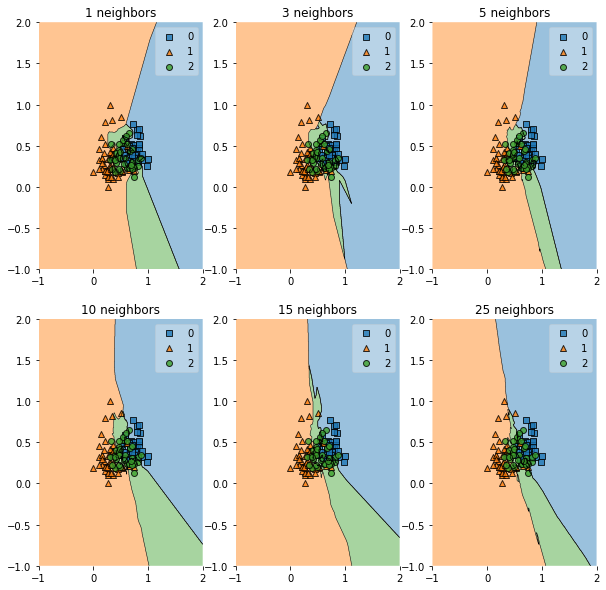

In [16]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(ncols=3, nrows=2)

fig = plt.figure(figsize=(10,10))

labels = parameters
for clf, lab, grd in zip(models,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train_tr), y=np.array(y_train), clf=clf)
    plt.title(f'{lab} neighbors')

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [17]:
answer

,NN,Train,Test
0,1,0.991935,0.703704
1,3,0.830645,0.703704
2,5,0.798387,0.740741
3,10,0.766129,0.740741
4,15,0.774194,0.685185
5,25,0.750000,0.759259


From https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn \
"Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.
Generally, Data scientists choose as an odd number if the number of classes is even."

Так что число соседей для каждой задачи и установленных требований заказчика - свое. В нашем же примере, самым оптимальным количеством для максимизации совпадений на тестовой выборке является 25, а если бы мы искали максимизирующее на обучающей - 1))))

In [18]:
answer['general'] = (answer['Train'] + answer['Test'])/2
answer

,NN,Train,Test,general
0,1,0.991935,0.703704,0.847820
1,3,0.830645,0.703704,0.767174
2,5,0.798387,0.740741,0.769564
3,10,0.766129,0.740741,0.753435
4,15,0.774194,0.685185,0.729689
5,25,0.750000,0.759259,0.754630


По средней ошибки на обучающей и тестовой, оптимально 5 соседа\
P.S. Если не учитывать k = 1, так как это просто переобучение

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

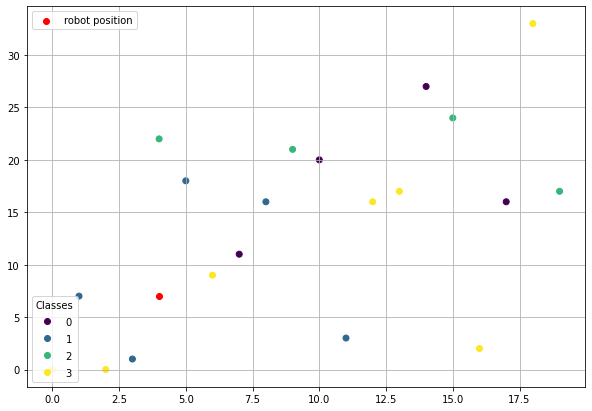

In [19]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from copy import deepcopy

In [22]:
import random

In [23]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''

        # Store the history of movements
        self.trajectory = np.array([initial_position])


        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        pos = np.array(deepcopy(self.trajectory[-1])) # Берем последнюю точку, где распологался робот
        '''
        Calculate new position of the robot and add it to the history
        '''
        if random.choices(['rules', 'right'], [0.8, 0.2]) == ["rules"]: # Конструкция для совершения выбора на основании некой вероятности
            pos += self.mapping[self.knn.predict(pos.reshape(-1, 2))[0]]
                
        else:
            pos += np.array([1, 0])
        self.trajectory = np.vstack((self.trajectory, pos)) #Добавляем к списку траектории новую точку

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [24]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory # Просто достаем список из списков из атрибута класса
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

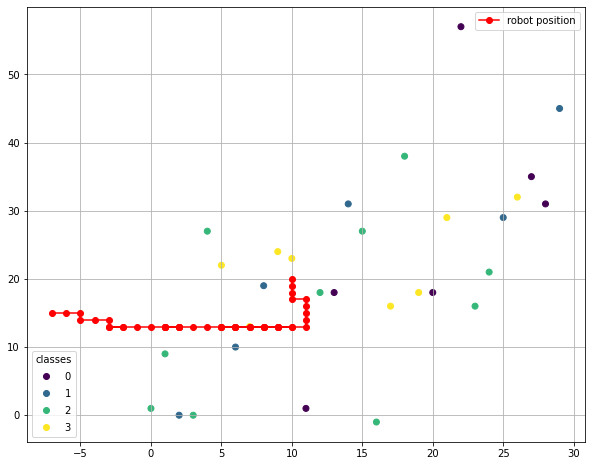

In [25]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

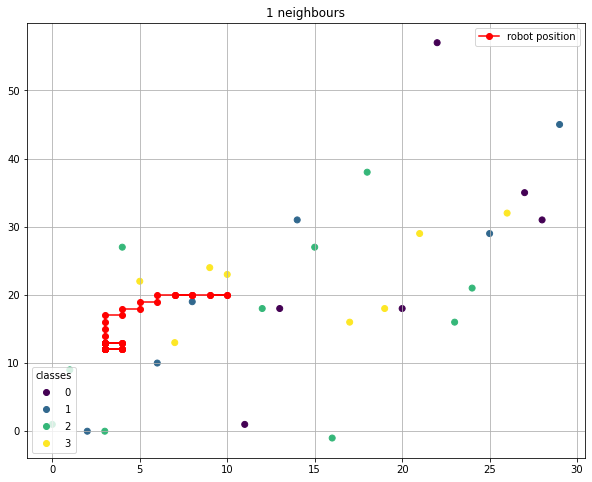

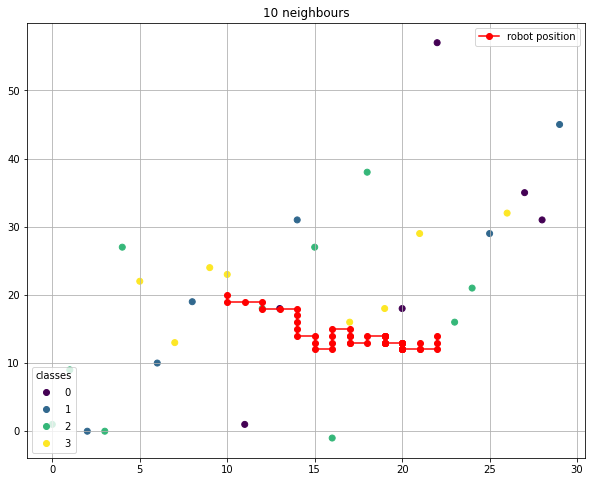

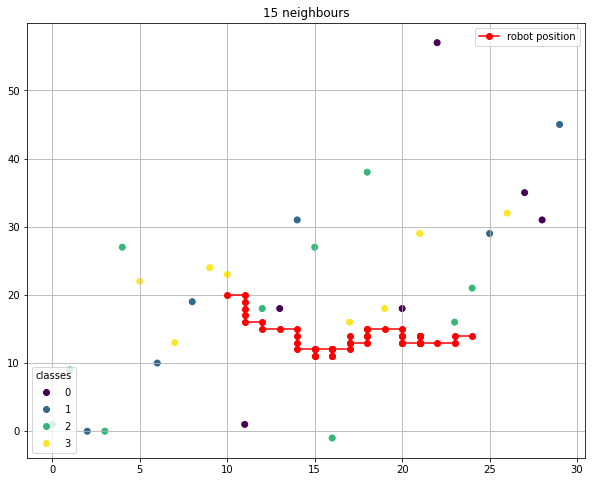

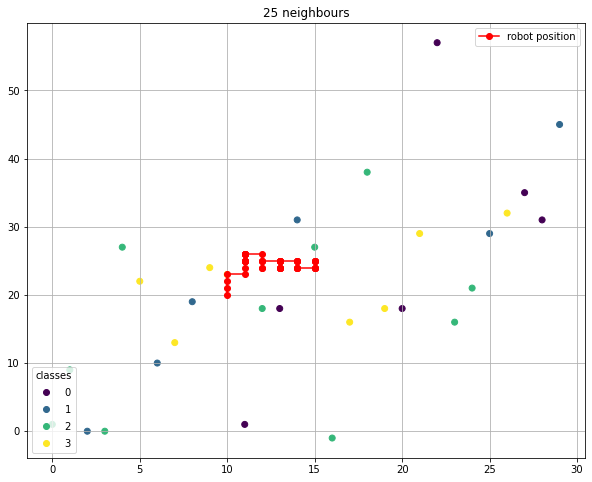

In [26]:
parameters = [1, 10, 15, 25]
for k in parameters:
    conduct_experiment(x, mean = 3, std = 10, k = k, n_movements = 50)
    plt.title(f'{k} neighbours')

Воспользовавшись методом пристального взгляда, можно сделать вывод, что чем больше количество соседей - тем менее подвижен робот 🤖 

В случае, если классы назначаются меткам не случайно, а осмысленно, можно было бы моделировать возможное движения робота - написать прикольную игру, где вместо кубика наш робот, и в каждая точка некое задание (тип DnD). Но это было бы слишком трудоемко 😅

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [65]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [66]:
data.isnull().any().any()

False

Как видим - пропущенных значений нет)

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Я конечно не силен в ювелирном деле, поэтому, кажись, признак "Unnamed: 0" никак не повлияет на предсказание стоимости

In [68]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [69]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [70]:
ves_features = data.columns[data.dtypes != "object"]
data[ves_features]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [71]:
data[ves_features].corr()["price"] # Вывод матрицы в виде pandas.core.series.Series

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

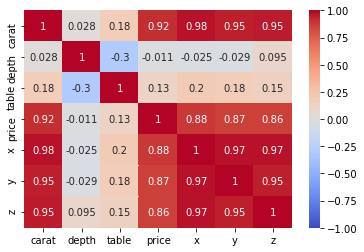

In [72]:
import seaborn as sns
# Вывод матрицы в виде heatmap
sns.heatmap(data[ves_features].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

In [73]:
print(*ves_features[data[ves_features].corr()["price"] > 0.5])
# Рассмотрим признаки, у которых коэфицент корреляции > 0.5

carat price x y z


Ими стали carat, price, x, y, z

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [74]:
data_dum = pd.get_dummies(data, drop_first=True, sparse=True)
data_dum

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [75]:
data_train, data_test = train_test_split(data_dum, random_state=5, test_size= 0.3)

# Заранее ресетним индексы, чтобы не словить строчки с NaN при масштабировании
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [76]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_train[ves_features.drop(['price'])] = pd.DataFrame(sc.fit_transform(data_train[ves_features.drop(['price'])]))
data_test[ves_features.drop(['price'])] = pd.DataFrame(sc.transform(data_test[ves_features.drop(['price'])]))

/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [77]:
# Разобьем данные на таргет и параметры 
y_train = data_train['price']
y_test = data_test['price']

X_train = data_train.drop('price', axis=1)
X_test = data_test.drop('price', axis=1)

In [78]:
from sklearn.linear_model import LinearRegression

# Обучение линейной регресии
reg = LinearRegression()
reg.fit(np.array(X_train), y_train)
y_hat_pt = reg.predict(np.array(X_train))

# Подсчет MSE
print("The Mean Square Error is: " , np.mean((y_hat_pt - y_train)**2))

The Mean Square Error is:  1276429.67763654


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [79]:
reg_cof = reg.coef_
reg_cof

array([ 5.33602429e+03, -8.86368418e+01, -5.47000487e+01, -1.09157431e+03,
        2.36227698e+00, -5.24195184e+01,  6.12974981e+02,  8.72282399e+02,
        7.89569048e+02,  7.52780171e+02, -1.80671023e+02, -2.53773188e+02,
       -4.62632538e+02, -9.49347869e+02, -1.46232665e+03, -2.35956471e+03,
        5.31448472e+03,  3.66284173e+03,  2.68598277e+03,  4.57675761e+03,
        4.26619113e+03,  5.01064615e+03,  4.94105482e+03])

In [80]:
# Так мы найдем изначально вещественные признаки
col = np.array(X_train.columns) # Для запоминания названия колонок
ves = [True if i in ves_features else False for i in col]

In [81]:
print(*ves_features.drop('price')[abs(reg.coef_[ves]) > abs(reg.coef_[ves]).mean()])

carat


Таким образом, только признак carat из всех вещественных признаков по модулю превосходит среднее значение коэфицентов вещественных признаков в модели

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [82]:
from sklearn.linear_model import Lasso, Ridge

In [83]:
# Здесь все вещ признаки кроме one-hot масштабировались)
lasso = Lasso(alpha = 10)
lasso.fit(np.array(X_train), y_train)
lasso_cof = lasso.coef_
lasso_cof

array([ 4.78595044e+03, -1.54200815e+02, -1.03098060e+02, -7.13914726e+02,
       -0.00000000e+00, -4.23233676e+00, -0.00000000e+00,  1.90380039e+02,
        8.55315272e+01,  9.43366306e+01,  1.04678631e+01, -0.00000000e+00,
       -1.16100869e+02, -5.88250818e+02, -1.01599103e+03, -1.78346052e+03,
        1.36310520e+03,  8.20514031e+01, -7.33387250e+02,  9.08173220e+02,
        6.68707507e+02,  1.24172702e+03,  1.24393535e+03])

In [84]:
ridge = Ridge(alpha= 10)
ridge.fit(np.array(X_train), y_train)
ridge_cof = ridge.coef_
ridge_cof

array([ 5.28726776e+03, -9.12602847e+01, -5.77637238e+01, -1.05244731e+03,
        3.58280297e+00, -5.63942524e+01,  6.36624835e+02,  9.01007707e+02,
        8.14780879e+02,  7.83453755e+02, -1.68924450e+02, -2.40822055e+02,
       -4.45609612e+02, -9.32193601e+02, -1.43830483e+03, -2.32398843e+03,
        4.74233487e+03,  3.13572018e+03,  2.16663568e+03,  4.04034258e+03,
        3.73561779e+03,  4.45983953e+03,  4.39830662e+03])

In [85]:
print("Среднее отклонение коэфицентов lin и lasso reg моделей: ",(reg_cof - lasso_cof).mean())
print("Среднее отклонение коэфицентов lin и ridge reg моделей: ",(reg_cof - ridge_cof).mean())

Среднее отклонение коэфицентов lin и lasso reg моделей:  1148.111983663054
Среднее отклонение коэфицентов lin и ridge reg моделей:  155.2390851285694


Веса уменьшились сильно у лассо-регрессии

Из анализа среднего отклонения в коэфицентов, проблема мультиколлинеарности сильно проявилась при изучение различий в коэфицентах lasso и lin reg моделей)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [86]:
for i in X_train.columns:
    print(i , X_train[i].mean())
print("\n" + "Как видно из выше представленных средних значений по каждому параметру, их величина не превосходит по модулю 10. Значит рассматривать высокие штрафующие элементы нет смыслы, так как они будут лишь занулять все коэфиценты моделей. Поэтому добавим более маленькие величины альфы, чтобы сравнить полученные точности моделей с этим высказыванием )")

carat -2.385224105026556e-16
depth 3.3530511324152406e-15
table -5.306770789881568e-17
x -3.421173509221522e-16
y 6.3521293621437e-16
z 3.7937765646812915e-16
cut_Good 0.0919010540812543
cut_Ideal 0.39959743630488903
cut_Premium 0.2555484930345887
cut_Very Good 0.22305206843582817
color_E 0.18054452036654484
color_F 0.17638646114730652
color_G 0.2083002277663012
color_H 0.15575507177286932
color_I 0.10106467503575402
color_J 0.05127390221939721
clarity_IF 0.033688225011918004
clarity_SI1 0.24148524815933048
clarity_SI2 0.17222840192806824
clarity_VS1 0.15117326129561948
clarity_VS2 0.22564754489114888
clarity_VVS1 0.06674082313681869
clarity_VVS2 0.09489379734096086

Как видно из выше представленных средних значений по каждому параметру, их величина не превосходит по модулю 10. Значит рассматривать высокие штрафующие элементы нет смыслы, так как они будут лишь занулять все коэфиценты моделей. Поэтому добавим более маленькие величины альфы, чтобы сравнить полученные точности моделей с э

In [87]:
# Добавил альфа = {0.0001, 0.001, 0.01}
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]
rid = []
las = []
for i in alpha:
    ridge = Ridge(alpha= i)
    ridge.fit(np.array(X_train), y_train)
    rid.append(np.linalg.norm(ridge.coef_))
    
    lasso = Lasso(alpha = i)
    lasso.fit(np.array(X_train), y_train)
    las.append((np.linalg.norm(lasso.coef_)))

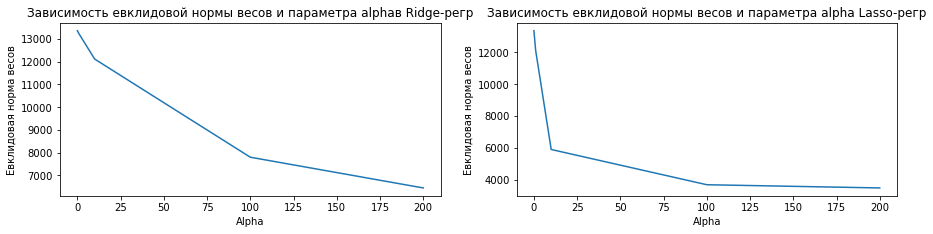

In [88]:
import pylab

plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
plt.title("Зависимость евклидовой нормы весов и параметра alphaв Ridge-регр") 
plt.xlabel("Alpha")
plt.ylabel("Евклидовая норма весов")
plt.plot(alpha, rid)

plt.subplot(2, 2, 2)
plt.title("Зависимость евклидовой нормы весов и параметра alpha Lasso-регр") 
plt.xlabel("Alpha")
plt.ylabel("Евклидовая норма весов")
plt.plot(alpha, las);

Как видим, что с ростом параметра штрафов метод Lasso-reg сильнее уменьшают коэфиценты моделей, чем это делает Ridge-reg

Более математически-аргументированное объяснение представлено ниже:

Источник (https://neerc.ifmo.ru/wiki/index.php?title=Вариации_регрессии#.D0.9B.D0.B0.D1.81.D1.81.D0.BE-.D1.80.D0.B5.D0.B3.D1.80.D0.B5.D1.81.D1.81.D0.B8.D1.8F)

Основное различие лассо- и ридж-регрессии заключается в том, что первая может приводить к обращению некоторых независимых переменных в ноль, тогда как вторая уменьшает их до значений, близких к нулю. Рассмотрим для простоты двумерное пространство независимых переменных. В случае лассо-регрессии органичение на коэффициенты представляет собой ромб (|β1|+|β2|≤t)
, в случае ридж-регрессии — круг (β1^2+β2^2≤t^2). Необходимо минимизировать функцию ошибки, но при этом соблюсти ограничения на коэффициенты. С геометрической точки зрения задача состоит в том, чтобы найти точку касания линии, отражающей функцию ошибки с фигурой, отражающей ограничения на β
. В случае лассо-регрессии эта точка с большой вероятностью будет находиться на углах ромба, то есть лежать на оси, тогда как в случае ридж-регрессии такое происходит очень редко. Если точка пересечения лежит на оси, один из коэффициентов будет равен нулю, а значит, значение соответствующей независимой переменной не будет учитываться.

![](https://neerc.ifmo.ru/wiki/images/e/e8/Ridge_and_Lasso_Regression.png)

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [89]:
from sklearn.linear_model import LassoCV

In [90]:
lasso = LassoCV(alphas = alpha, cv=5)
lasso.fit(np.array(X_train), y_train)

# Дабы красиво все вывести:
answer = pd.DataFrame()
answer['alpha'] = lasso.alphas_
answer['mse'] = [i.mean() for i in lasso.mse_path_]
answer

,alpha,mse
0,200.0000,2.452117e+06
1,100.0000,2.240370e+06
2,10.0000,1.511828e+06
3,1.0000,1.284810e+06
4,0.1000,1.281681e+06
5,0.0100,1.281811e+06
6,0.0010,1.281828e+06
7,0.0001,1.281830e+06


In [91]:
best = answer[answer['mse'] == answer['mse'].min()]['alpha'].tolist()
print("Значения альфа, дающее наибольшее качество модели: ", *best)

Значения альфа, дающее наибольшее качество модели:  0.1


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [92]:
X_train.columns # Изначальные признаки модели

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [93]:
lasso = Lasso(alpha = best[0])
lasso.fit(np.array(X_train), y_train)

# Красиво выведем признаки и их коэфицент в итоговой модели:
answer = pd.DataFrame()
answer['Признак'] = X_train.columns
answer['Параметр'] = lasso.coef_
answer

,Признак,Параметр
0,carat,5331.206691
1,depth,-90.039204
2,table,-55.340072
3,x,-1089.753443
4,y,0.000000
5,z,-48.516538
6,cut_Good,602.891146
7,cut_Ideal,862.573164
8,cut_Premium,779.690430
9,cut_Very Good,743.455758


In [94]:
#Исключим неинформативные признаки (возьмем отсечку на значении коэф > среднее значение):
more_appropriate_answer = answer[abs(answer['Параметр']) > abs(answer['Параметр']).mean()].sort_values(by=['Параметр'], ascending=False)
non_inf = set(answer['Признак']) - set(more_appropriate_answer['Признак'])
more_appropriate_answer

,Признак,Параметр
0,carat,5331.206691
16,clarity_IF,5260.634631
21,clarity_VVS1,4958.624702
22,clarity_VVS2,4889.916186
19,clarity_VS1,4526.013733
20,clarity_VS2,4216.246615
17,clarity_SI1,3613.225861
18,clarity_SI2,2636.795308
15,color_J,-2351.572417


In [95]:
print('Неинформативными признаками оказались: ', list(non_inf))
print('Наиболее информативными признаками оказались: ', more_appropriate_answer['Признак'].tolist())

Неинформативными признаками оказались:  ['depth', 'x', 'cut_Good', 'color_F', 'table', 'color_I', 'cut_Very Good', 'y', 'color_H', 'z', 'cut_Ideal', 'color_E', 'cut_Premium', 'color_G']
Наиболее информативными признаками оказались:  ['carat', 'clarity_IF', 'clarity_VVS1', 'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1', 'clarity_SI2', 'color_J']


Повторюсь, я конечно не силен в ювелирии. Однако обычно цену драгоценного камня в большей степени определяет показательcarat, а уже в дальнейшем его уникальные свойства clarity и color. Исходя из полученных данных эти свойства наиболее редкие и трудоемкие => алмаз становится дороже)

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [96]:
y_los = lasso.predict(np.array(X_test))
y_lin = reg.predict(np.array(X_test))

print("The Mean Square Error for Loss-reg is: " , np.mean((y_los - y_test)**2))
print("The Mean Square Error for Lin-reg is: " , np.mean((y_lin - y_test)**2))

The Mean Square Error for Loss-reg is:  1277756.367448345
The Mean Square Error for Lin-reg is:  1277672.6000845411


Как видим, в данной задачи для предасказаний лучше использовать lin-reg. Однако такое встречается не всегда. В нашем же случае либо нам не повезло с подборкой штрафующего параметра в Lasso (не абсолютно всевозможные значения были рассмотрены), либо влияние выбросов в модели не так велико - можно использовать линейную регрессию и не парится

## Meme of the HW

![](https://www.testbytes.net/wp-content/uploads/2019/06/Untitled-34-300x300.png)